<a href="https://colab.research.google.com/github/kristinapohl/DeepLearning/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="margin:auto; display:table;color:black;font-size:18px;font-family:Arial">Fachhochschule Südwestfalen</span>

<span style="margin:auto; display:table;color:black;font-size:18px;font-family:Arial">Semesterabschließende schriftliche Ausarbeitung im Modul Deep Learning (Wintersemester 2025/2026)</span>

<span style="margin:auto; display:table;color:black;font-size:30px;font-family:Arial"><br><br>Fraud detection with Deep Learning<br>
</span>
    
<span style="margin:auto; display:table;color:black;font-size:18px;font-family:Arial"><br><br><br><br>Bearbeitet von Kristina Wind (Matrikelnummer: 30507061) und Gesa Dickhof</span>

<span style="margin:auto; display:table;color:black;font-size:18px;font-family:Arial"><br>28. Februar 2026</span>

# Inhaltsverzeichnis

1. [Einleitung](#einleitung)<br>
2. [Literaturrecherche](#recherche)<br>
3. [Daten](#2-datenb)<br>
    3.1 [Datenquelle](#31-datenquelle)<br>
    3.2 [Merkmale](#32-merkmale)<br>
    3.3 [Import und Analyse](#33-import_analyse)<br>
    3.4 [Datenvorverarbeitung](#34-datenvorverarbeitung)<br>
    3.5 [Datenvisualisierung](#35-datenvisualisierung)<br>
    3.6 [Datensätze splitten](#36-datensätze_splitten)<br>
4. [Qualitätsmaß](#4-qualitätsmaß)<br>
5. [Vorhersagemodelle](#5-vorhersagemodellel)<br>
    5.1 [Lineare Regression](#51-lineare_Regression)<br>
    5.2 [Random Forrest](#52-random_Forrest)<br>
    5.3 [Support Vector Regression](#53-support_Vector_Regression)<br>
6.  [Ergebnisse & Visualisierung](#ergebnisse)<br>
7.  [Zusammenfassung](#zusammenfassung)<br>
8.  [Literaturverzeichnis](#literatur)<br>
9.  [Quellen und Referenzen](#ref)<br>
10. [Eigenständigkeitserklärung](#eigenständigkeitserklärung)<br>


# 1. Einleitung

In dieser Ausarbeitung werden Deep Learning Modelle miteinander anhand ihrer Genauigkeit verglichen, mit denen es möglich ist, gefälschte oder manipulierte Fotos zu erkennen. Ziel ist es, auf dieser Grundlage Versicherungsbetrug automatisiert zu erkennen.


Der Fokus dieser Arbeit liegt auf der Umsetzung mit Supervised Learning Algorithmen. Es wird ein CNN und ein Autoencoder Modell verwendet und anhand ihrer Vorhersagegenauigkeit miteinander verglichen.






## 2. Literaturrecherche

Pham et al. (2021) [1] verwenden Algorithmen aus den Bereichen des Deep
Learning für die Bildforensik

1.   Convolutional Neural Network (CNN)
2.   Encoder-Decoder Network
3.   Auto-Encoder Network
4.   R-CNN
5.   U-Net
6.   LSTM

Die folgenden Datensätze wurden verwendet
1.   Columbia Image Splicing Detection Evaluation Dataset
2.   CASIA Forensic Datasets v1 und v2   
3.   Forensic Dataset
4.   Copy-Move Forgery Detection (CoMoFoD) Dataset
5.   GRIP Dataset
6.   Coverage Dataset





# 3. Daten


## 3.1 Datenquelle
Wetterstation des Deutschen Wetterdienstes:

Stationsname: Königswinter-Heiderhof  
Bundesland: Nordrhein-Westfalen
Stations_id: 00603
geoBreite: 50.7293  
geoLaenge: 7.2040
von_datum: 20010403
bis_datum: 20250701
Stationshoehe: 147
                                                           
Beschreibung der Temperaturdaten:
https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/BESCHREIBUNG_obsgermany_climate_hourly_air_temperature_de.pdf

Beschreibung der Luftdruckdaten:
https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/pressure/BESCHREIBUNG_obsgermany_climate_hourly_pressure_de.pdf

Vorhandene Messwerte:
https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/

Die Qualität der Daten, mit denen ein Machine Learning Algorithmus trainiert wird, ist von grundlegender Bedeutung für die Qualität der Vorhersage. Für dieses Projekt werden Messwerte des Deutschen Wetterdienstes verwendet. Die Temperaturwerte werden dort stundengenau für die Messstation in Königswinter Heiderhof angegeben. Da Parashar et al. (2021) [1] herausgefunden haben, dass  Werte besonders gut für die Vorhersage geeignet sind, wenn sie jede Stunde erhoben worden sind, wird diese Datenquelle für die vorliegende Aufgabenstellung ausgewählt. Die Datensätze enthalten Messwerte von bis zu 9.000 Tagen und über 200.000 Stunden. Messfehler könnten der Grund dafür sein, dass die Anzahl der Messwerte bei verschiedenen Datensätze nicht identisch  sind.

Bevor die Modelle mit den Daten trainiert werden, werden die Daten aufbereitet. Im Folgenden wird beschrieben wie die Daten für dieses Projekt aufbereitet wurden.
      
Da der Deutsche Wetterdienst darauf hinweist, dass die Qualität der Daten des Datensatzes  aufgrund der Aktualität nicht durchgängig überprüft werden kann [9], erscheint eine Fehlerkorrektur zur Qualitätssicherung sinnvoll und notwendig. Vor der Erstellung des Modells wird der Datensatz auf fehlende und fehlerhafte Daten untersucht. Ausreißer werden durch Visualisierung des Temperaturverlaufs sichtbar. Um nicht alle Daten plotten und betrachten zu müssen, werden die Daten geglättet, um den Einfluss etwaiger Ausreißer zu reduzieren.  
Das Glätten der Daten über die Funktion Moving Average bietet eine geeignete Möglichkeit den Datensatz für Machine Learning Modelle vorzubereiten.
      
Durch die Festlegung auf Supervised Learning Algorithmen müssen die Daten in Fenster mit einer festgelegten Länge aufgeteilt werden. Die Fenster bestehen aus den Inputwerten, also den Merkmalen der vorangehenden Stunden und den zugehörigen Labeln, also den Temperaturwerten der darauf folgenden Stunden. Für das vorliegende Projekt werden die Merkmale von 30 Stunden als Inputwerte festgelegt, um die Temperatur der nächsten Stunde oder der folgenden 20 Stunden vorherzusagen.
      
Für die hier beschriebenen Modelle wird das Fenster jeweils um eine Stunde verschoben. Dadurch enthalten verschiedene Fenster ähnliche Abfolgen von Werten. So ist es möglich, die maximale Anzahl an Fenstern aus den vorhandenen Daten zu erzeugen. Die erstellten Datenfenster werden in einem Verhältnis von 80/20 in Train- und Test-Set aufgeteilt. Um sämtliche Merkmale auf die gleiche Skala zu bringen werden die Inputwerte standardisiert.






## 3.2 Merkmale

   
Folgende Merkmale sind in den beiden hier verwendeten Datensätzen [5] enthalten und werden für die Temperaturvorhersage verwendet:

- 1.Temperatur:
    - TT_TU - Lufttemperatur in 2 m Höhe [°C]
- 2.Luftfeuchtigkeit:
    - RF_TU - Relative Luftfeuchtigkeit [%]
- 3.Luftdruck:
    - P - Luftdruck auf Meereshöhe [hPA]
    - P0: Luftdruck auf Stationshöhe [hPA]
- 4.Zeitstempel:
    - Messdatum: Jahr | Monat | Tag | Stunde (Stunde geht von 00 bis 23)
-Fehlwerte sind mit -999 gekennzeichnet.

Die Zielvariable, die vorausgesagt werden soll, ist die Temperatur in der nächsten Stunde bzw. für die nächsten 20 Stunden.

Für die Verarbeitung ist hier wichtig zu beachten, dass alle Merkmale bis auf den Zeitstempel nummerische Merkmale sind. Beim Umgang mit fehlenden Werten muss das beachtet werden.



Quellcode



In [ ]:
# Paketimport:

required_packages = [
    "numpy",
    "pandas",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "requests"
]
#
#for package in required_packages:
    #!pip install {package}



In [ ]:
# Temperatur und Luftfeutchtigkeit Messdaten:
url = 'https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/stundenwerte_TU_00603_20010403_20241231_hist.zip'
# Luftdruck Messdaten:
url_pres = 'https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/pressure/historical/stundenwerte_P0_00603_19990303_20241231_hist.zip'

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import requests, zipfile, io
import calendar
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor



## 3.3 Import und Analyse


In [ ]:
def import_data(url):
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))

    for file in z.namelist():
        if "produkt_" in file:
            filename = file

    file = z.extract(filename)
    df = pd.read_csv(filename, sep=';')
    #Überflüssige Spalten entfernen: Stations-ID, Qualitätswert, eor
    df.drop(df.columns[[0,2,5]], axis=1, inplace=True)
    # eor = end of record, signalisiert Zeilenende bzw. Ende der Messung
    df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H') #Zeitstempel in Pandas datetime-Format umwandeln
    # Spalten umbenennen, damit sie einfacherer zu interpretieren sind:
    df.rename(columns={ 'TT_TU': 'Temperatur'}, inplace = True)
    df.rename(columns={'RF_TU': 'Luftfeuchtigkeit [%]'}, inplace = True)
    df.rename(columns={ '   P': 'Luftdruck auf Meereshöhe'}, inplace = True)
    df.rename(columns={'  P0': 'Luftdruck auf Stationshöhe'}, inplace = True)
    return df

def combine_dataframes(df, df_pres):
    df = pd.merge(df, df_pres, on='MESS_DATUM', how='inner')
    return df

def import_and_combine_data(url_temp, url_pres):
    df = combine_dataframes(import_data(url_temp), import_data(url_pres))
    return df

Die Daten von der Webseite des Deutschen Wetterdienstes werden mit der Funktion "import_and_combine_data" heruntergeladen, unnötige Spalten werden entfernt, Spaltennamen werden durch sprechende Benennungen ersetzt und die beiden verschiedenen Datensätze werden miteinander zu einem Datensatz kombiniert.

Um die Daten zu analysieren, werden vor dem Erstellen und Trainieren der Modelle einzelne Funktionen schon ausgeführt. Für die Vorhersagemodelle werden sie in Kapitel 5 noch einmal gemeinsam aufgerufen.


In [ ]:
df = import_and_combine_data(url, url_pres)
# Datenstruktur mit Methode head() ansehen
df.head()


,MESS_DATUM,Temperatur,Luftfeuchtigkeit [%],Luftdruck auf Meereshöhe,Luftdruck auf Stationshöhe
0,2001-04-03 08:00:00,11.9,82.0,1016.3,996.9
1,2001-04-03 10:00:00,13.7,68.0,1017.0,997.7
2,2001-04-03 14:00:00,14.9,52.0,1016.9,997.7
3,2001-04-03 16:00:00,13.3,75.0,1016.6,997.3
4,2001-04-03 17:00:00,12.2,78.0,1016.8,997.4


Das Messdatum enthält auch die Uhrzeit. Hier sieht man, dass es nicht immer jede Stunde einen neuen Messwert gibt, wie es eigentlich angegeben ist.

## 3.4 Umgang mit Fehlwerten

Fehlende Werte müssen vor der Verwendung des Datensatzes mit einem Machine Learning Algorithmus behandelt werden. Es gibt verschiedene Möglichkeiten, mit Fehlwerten umzugehen. Entweder müssen sie entfernt oder sinnvoll aufgefüllt werden. Mit der Funktion dropna() werden beispielsweise standardmäßig die Zeilen entfernt, in denen es einen Fehlwert gibt.

In diesem Projekt werden Zeilen mit Fehlwerten in der Spalte des Zeitstempels mit dropna() gelöscht, weil diese Werte nicht numerisch sind und deshalb nicht durch Mittelwerte aufgefüllt werden können. Bei den anderen Merkmalen werden Fehlwerte mit fillna() mit den jeweiligen Mittelwerten befüllt [12].

In [ ]:
def missing_values(df):
    # Fehlwerte (-999 ) als NaN kennzeichnen, um sie später rauszufiltern:
    df.replace(-999, np.nan, inplace=True)
    # Zeilen mit Fehlwerten bei MESS_DATUM rausnehmen, weil die Werte nicht numerisch sind,
    # können wir sie später nicht so wie die anderen durch Mittelwerte ersetzen:
    df = df.dropna(subset=['MESS_DATUM'])
    # Hier wird fillna() verwendet, um die numerischen Merkmale durch Mittelwerte aufzufüllen:
    df = df.fillna(df.mean(numeric_only=True)) # Mit Mittelwert auffüllen
    return df

In [ ]:
df = missing_values(df)
start_date = df['MESS_DATUM'].min() # 2001-04-03 08:00:00
end_date = df['MESS_DATUM'].max()   # 2024-12-31 23:00:00
start_year = df['MESS_DATUM'].min().year
end_year = df['MESS_DATUM'].max().year
print("Es werden Messwerte von", start_date, "bis", end_date ,  "erfasst.\n")
null_werte = df.isnull().sum()
null_werte

Es werden Messwerte von 2001-04-03 08:00:00 bis 2024-12-31 23:00:00 erfasst.



,0
MESS_DATUM,0
Temperatur,0
Luftfeuchtigkeit [%],0
Luftdruck auf Meereshöhe,0
Luftdruck auf Stationshöhe,0


In [ ]:
# mit der Methode info() erhält man eine Beschreibung der Daten, u.a.
# Zeilenanzahl (205618 Zeilen), Attributstypen, Anzahl der Werte ungleich null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205618 entries, 0 to 205617
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   MESS_DATUM                  205618 non-null  datetime64[ns]
 1   Temperatur                  205618 non-null  float64       
 2   Luftfeuchtigkeit [%]        205618 non-null  float64       
 3   Luftdruck auf Meereshöhe    205618 non-null  float64       
 4   Luftdruck auf Stationshöhe  205618 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.8 MB



## 3.3 Datenvisualisierung


Die Datensätze des Deutschen Wetterdienstes werden zur Analyse vor der Verarbeitung visualisiert, um einen Überblick über die Datensatzstruktur zu erhalten.

In [ ]:
# Jahr 2002 filtern
df_2002 = df[df['MESS_DATUM'].dt.year == 2002]

# Tagesdurchschnitt berechnen
df_daily_2002 = df_2002.groupby(df_2002['MESS_DATUM'].dt.date)['Temperatur'].mean().reset_index()
df_daily_2002.columns = ['Datum', 'Temperatur'] # Die Spalte "Temperatur" enthält hier den jeweiligen Tagesdurchschnittswert

# Schritt 3: Jahr 2024 filtern
df_2024 = df[df['MESS_DATUM'].dt.year == 2024]

# Schritt 4: Tagesdurchschnitt berechnen
df_daily_2024 = df_2024.groupby(df_2024['MESS_DATUM'].dt.date)['Temperatur'].mean().reset_index()
df_daily_2024.columns = ['Datum', 'Temperatur'] # Die Spalte "Temperatur" enthält hier den jeweiligen Tagesdurchschnittswert


# Einteilung der x-Achse nach Tagen im jeweiligen Jahr, um die Zeitreihe zu plotten und
# gleichzeitig die Monatsnamen als Index an der x-Achse angeben zu können:
x_2002 = pd.to_datetime(df_daily_2002['Datum']).dt.dayofyear
x_2024 = pd.to_datetime(df_daily_2024['Datum']).dt.dayofyear

<Figure size 640x480 with 0 Axes>

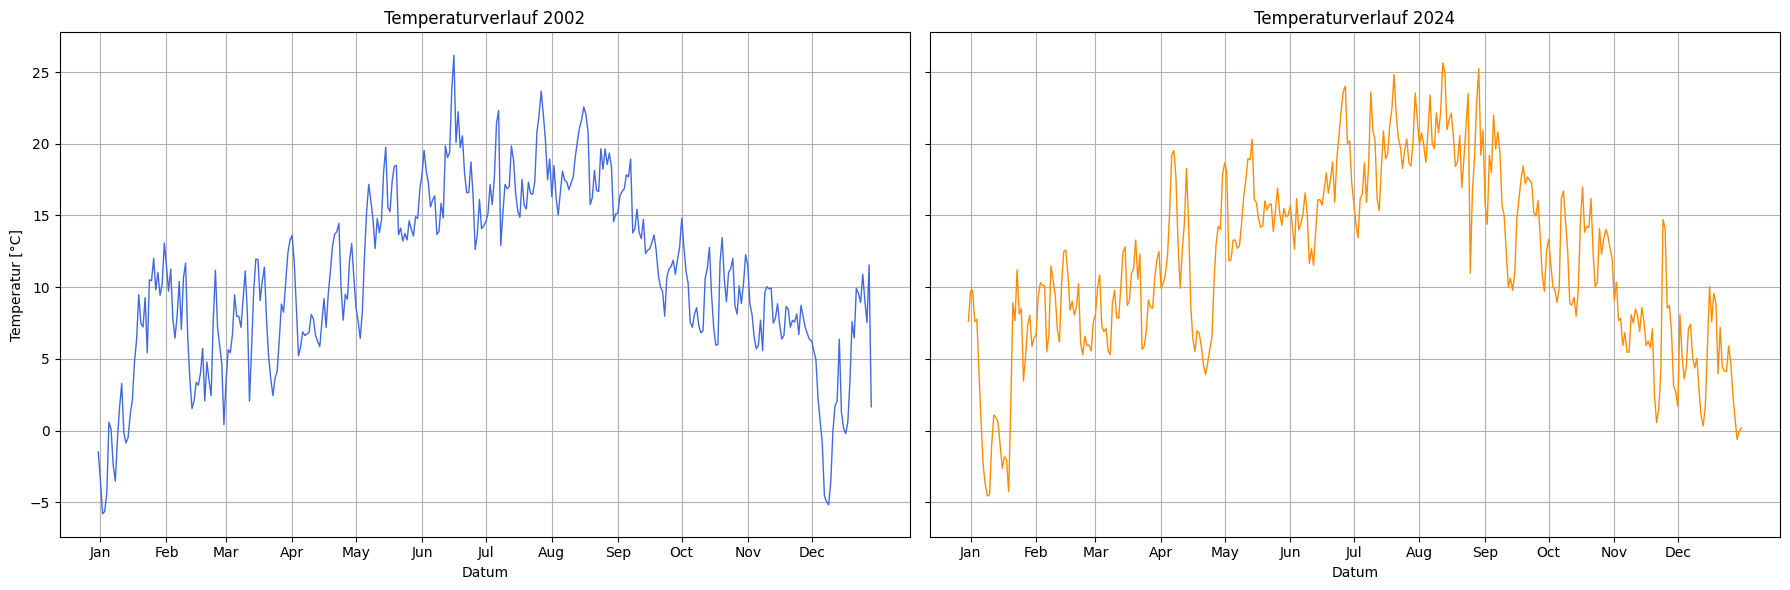

In [ ]:
plt.clf() #Wenn der Plot neu erstellt werden soll, werden vorhandene Plots mit plt.clf() gelöscht.

# Zwei Subplots mit gemeinsamer y-Achse erstellen:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# ungefähre Starttage der Monate angeben, um mit der Funktion calendar.month_abbr Monatsnamen
# als Indizes für die x-Achse zu verwenden:
month_days = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = [calendar.month_abbr[i] for i in range(1, 13)]

# Plot für 2002
axes[0].plot(df_daily_2002.index, df_daily_2002['Temperatur'], color='royalblue', linewidth=1)
axes[0].set_title('Temperaturverlauf 2002')
axes[0].set_xlabel('Datum')
axes[0].set_ylabel('Temperatur [°C]')
axes[0].grid(True)

axes[0].set_xticks(month_days)
axes[0].set_xticklabels(month_labels)

# Plot für 2024
axes[1].plot(df_daily_2024.index, df_daily_2024['Temperatur'], color='darkorange', linewidth=1)
axes[1].set_title('Temperaturverlauf 2024')
axes[1].set_xlabel('Datum')
axes[1].grid(True)
axes[1].set_xticks(month_days)
axes[1].set_xticklabels(month_labels)


plt.tight_layout()
plt.show()


Die jahreszeitlich bedingten Schwankungen führen zu der Vermutung, dass es wenig Sinn macht, eine sehr hohe Stundenanzahl an Werten zur Temperaturvorhersage zu nutzen. Dann würden Werte aus unterschiedlichen Jahreszeiten zusammengefasst. Der Messzeitraum, der für die Vorhersageparameter betrachtet wird, wird daher auf maximal zwei Tage beschränkt.

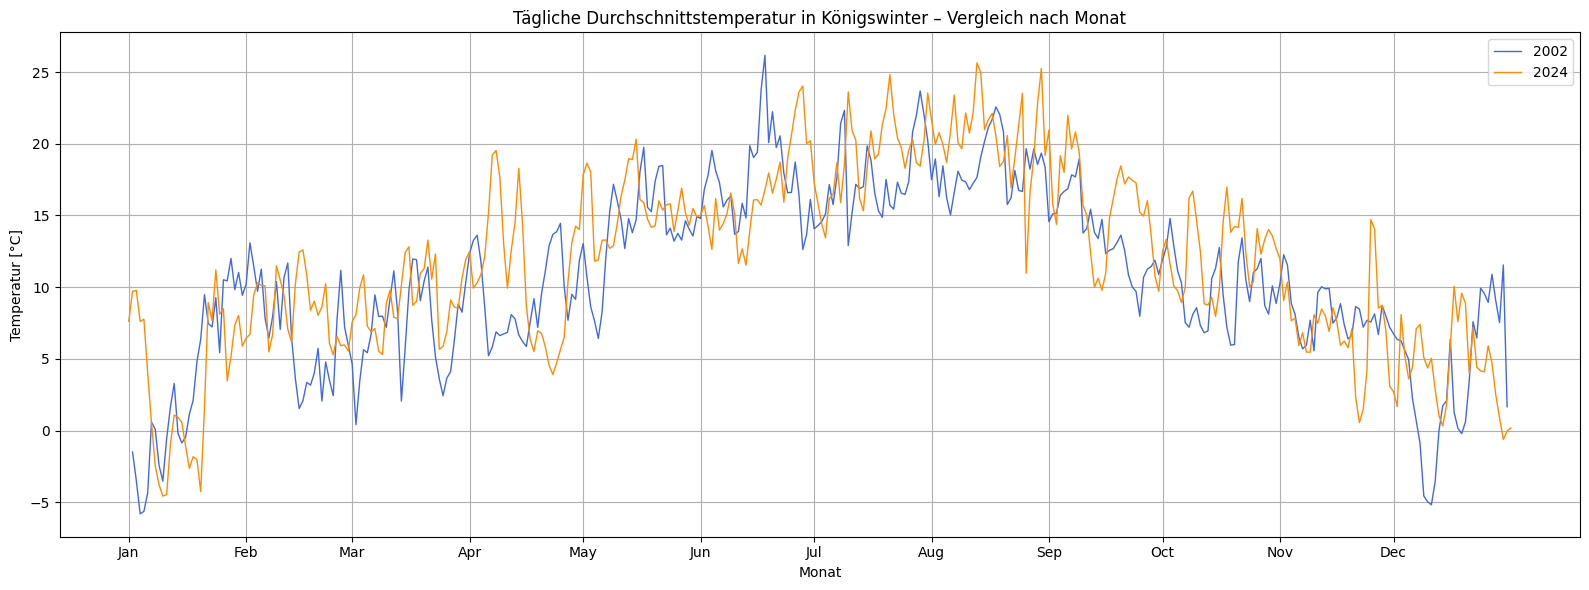

In [ ]:
#plt.clf()
plt.figure(figsize=(16, 6))

plt.plot(x_2002, df_daily_2002['Temperatur'], label='2002', color='royalblue', linewidth=1)
plt.plot(x_2024, df_daily_2024['Temperatur'], label='2024', color='darkorange', linewidth=1)

plt.title('Tägliche Durchschnittstemperatur in Königswinter – Vergleich nach Monat')
plt.xlabel('Monat')
plt.ylabel('Temperatur [°C]')
plt.legend()
plt.grid(True)

month_days = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # ungefähre Starttage der Monate
month_labels = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(month_days, month_labels)

plt.tight_layout()
plt.show()

Bei den Messungen aus dem Jahr 2001 fehlen die ersten drei Monate, deshalb wird hier das Jahr 2002, das erste Jahr aus dem Messbereich mit vollständigem Datensatz, mit dem letzten Jahr, 2024, verglichen.

In [ ]:
print(f"2002:  Min: {df_daily_2002['Temperatur'].min():.2f} °C, Max: {df_daily_2002['Temperatur'].max():.2f} °C, Mean: {df_daily_2002['Temperatur'].mean():.2f} °C")
print(f"2024:  Min: {df_daily_2024['Temperatur'].min():.2f} °C, Max: {df_daily_2024['Temperatur'].max():.2f} °C, Mean: {df_daily_2024['Temperatur'].mean():.2f} °C")

2002:  Min: -5.80 °C, Max: 26.17 °C, Mean: 10.80 °C
2024:  Min: -4.56 °C, Max: 25.64 °C, Mean: 11.92 °C



Histogramme:

Mithilfe der Histogramme wird festgestellt, wie gleichverteilt die vorliegenden Daten sind und wie gut mit Machine Learning Algorithmen die Vorhersage möglich sein wird. [12]

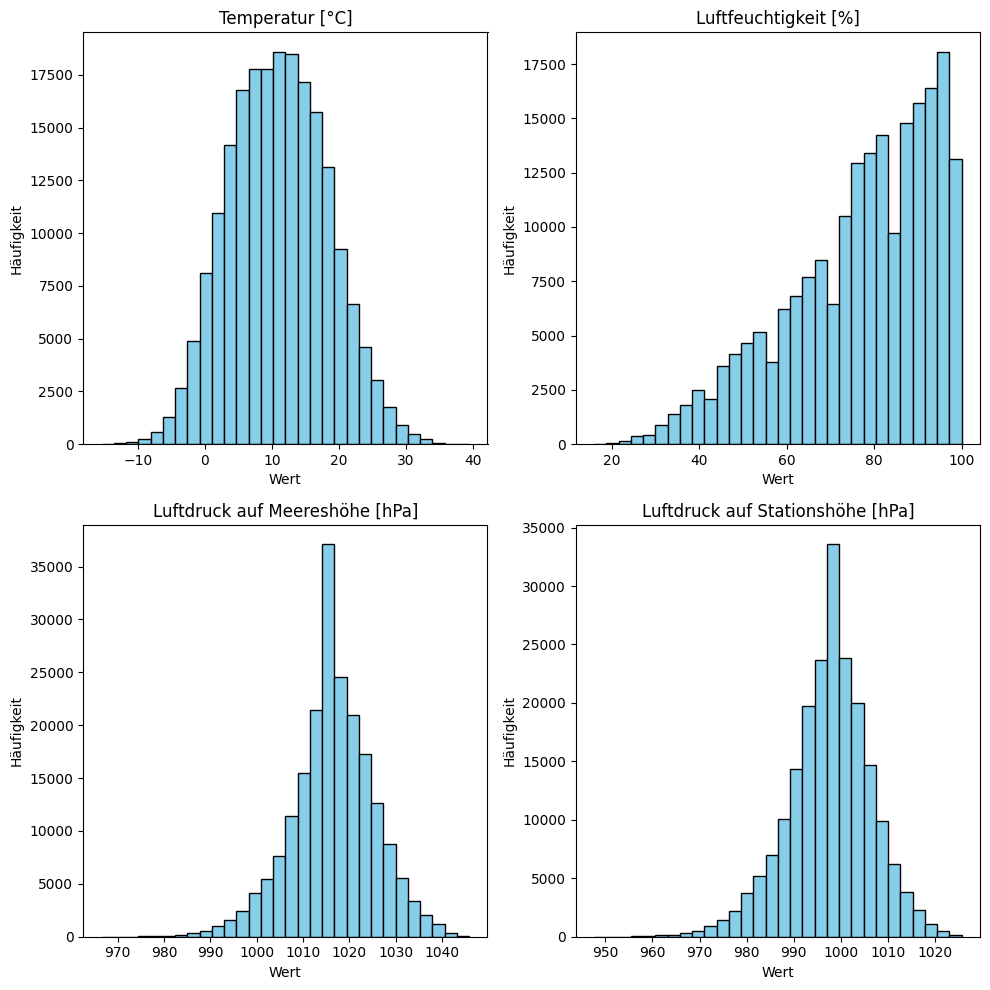

In [ ]:
# Plot-Konfiguration
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = [10, 10]

# Daten vorbereiten
data = [
    df['Temperatur'],
    df['Luftfeuchtigkeit [%]'],
    df['Luftdruck auf Meereshöhe'],
    df['Luftdruck auf Stationshöhe']
]

titles = [
    'Temperatur [°C]',
    'Luftfeuchtigkeit [%]',
    'Luftdruck auf Meereshöhe [hPa]',
    'Luftdruck auf Stationshöhe [hPa]'
]

# Subplots erstellen
fig, axes = plt.subplots(2, 2)
axes = axes.ravel()

for idx, ax in enumerate(axes):
    ax.hist(data[idx].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax.set_title(titles[idx])
    ax.set_xlabel('Wert')
    ax.set_ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

Die Histogramme zeigen die Häufigkeitsverteilung der verschiedenen Merkmale.

Die Werte für den Luftdruck auf Stationshöhe bzw. auf Meereshöhe sind sehr ähnlich verteilt, aber die Werten sind offensichtlich nicht identisch.

Alle Merkmale bis auf die Luftfeuchtigkeit scheinen recht gleichmäßig verteilte Werte aufzuweisen. Datensätze mit ungleich verteilten Daten sollten vorverarbeitet werden, bevor sie einem Machine Learning Algorithmus übergeben werden. Damit kann die Vorhersagegenauigkeit erhöht werden.
Im Fall des Merkmals Luftfeuchtigkeit könnten Ausreißer (Extremwerte) oder Messfehler eine Erklärung für die ungleiche Verteilung der Messwerte darstellen. Um hier eine korrekte Bewertung vornehmen zu können, wären meteorologische Fachkenntnisse hilfreich. Es kann hilfreich sein, die Daten mit der Funktion np.sqrt(), np.log1p() oder moving average zu glätten, um eine gleichmäßigere Verteilung zu erreichen [12].


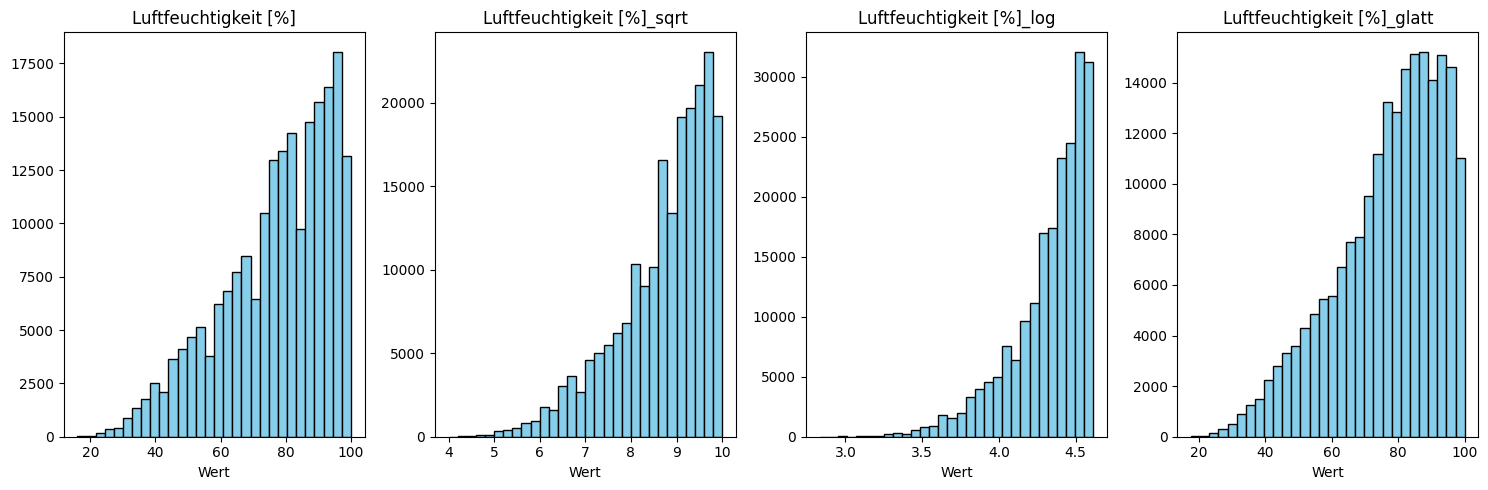

In [ ]:
df['Luftfeuchtigkeit [%]_sqrt'] = np.sqrt(df['Luftfeuchtigkeit [%]'])
df['Luftfeuchtigkeit [%]_log'] = np.log1p(df['Luftfeuchtigkeit [%]'])
# Gleitender Durchschnitt mit Fenstergröße 5
df['Luftfeuchtigkeit [%]_glatt'] = df['Luftfeuchtigkeit [%]'].rolling(window=5).mean() # Daten mit moving average glätten


plt.close('all')
# Plot-Konfiguration
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = [10, 10]

# Daten vorbereiten
data = [
    df['Luftfeuchtigkeit [%]'],
    df['Luftfeuchtigkeit [%]_sqrt'],
    df['Luftfeuchtigkeit [%]_log'],
    df['Luftfeuchtigkeit [%]_glatt']
]

titles = [
    'Luftfeuchtigkeit [%]',
    'Luftfeuchtigkeit [%]_sqrt',
    'Luftfeuchtigkeit [%]_log',
    'Luftfeuchtigkeit [%]_glatt'
]

# Subplots erstellen
# Falls axes kein Array ist (bei nur 1 Plot), in Liste umwandeln
num_plots = len(data)
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

if num_plots == 1:
    axes = [axes]

for idx in range(num_plots):
    axes[idx].hist(data[idx].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(titles[idx])
    axes[idx].set_xlabel('Wert')

plt.tight_layout()
plt.show()


Nach Anwendung der Logithmus- und der Wurzel-Transformation sind die Daten noch rechtslastiger, so dass diese so nicht weiterverwendet werden.

Die Merkmalsdaten werden später noch vor der Verwendung in den Machine Learning Algorithmen geglättet und normalisiert, damit sie für die Lineare Regression besser verwertbar sind. Auf das Glätten aller Daten wird hier verzichtet, weil es nicht so aussieht, als könne dies Vorteile bieten.

In [ ]:
# Entferne die neu hinzugefügten Spalten, weil sie keine Verbesserung bewirken konnten:
df.drop(columns=['Luftfeuchtigkeit [%]_log', 'Luftfeuchtigkeit [%]_sqrt', 'Luftfeuchtigkeit [%]_glatt'], inplace=True)


Es sieht so aus, als wären der Luftdruck auf Stationshöhe und der Luftdruck auf Meereshöhe gleich. Aus den vorherigen Plots wurde ersichtlich, dass die Verteilungen ähnlich, aber nicht identisch sind. Da es sich um den Luftdruck, nur an unterschiedlichen Messpunkten, handelt, ist dies plausibel. Da in diesem Projekt nur eine Wetterstation betrachtet wird und die Höhe dieser Station irrelevant für die Vorhersage ist und aufgrund des sehr hohen Korrelationswertes zwischen diesen beiden Merkmalen, werden sie für die Weiterverarbeitung zu einem Merkmal zusammengefasst.

In [ ]:
# Führe beide Merkmale für Luftdruck zu einem zusammen:
df['Luftdruck'] = df[['Luftdruck auf Stationshöhe', 'Luftdruck auf Meereshöhe']].mean(axis=1)

# entferne die unnötigen Merkmale:
df.drop(columns=['Luftdruck auf Stationshöhe', 'Luftdruck auf Meereshöhe'], inplace=True)

#df.head()

## 3.4 Korrelation der Merkmale

In [ ]:
 corr_matrix = df.corr()
 corr_matrix

,MESS_DATUM,Temperatur,Luftfeuchtigkeit [%],Luftdruck
MESS_DATUM,1.000000,0.055256,-0.097131,0.005994
Temperatur,0.055256,1.000000,-0.510251,-0.093129
Luftfeuchtigkeit [%],-0.097131,-0.510251,1.000000,-0.034569
Luftdruck,0.005994,-0.093129,-0.034569,1.000000


Eine Korrelation zwischen dem MESS_DATUM und der Temperatur kann maximal durch den Monat (und die Jahreszeit) bestehen. Dieses Merkmal wird für die Vorhersage nicht aktiv genutzt, sondern nur, um Zeitfenster mit aufeinanderfolgenden
Die stärkste Korrelation besteht zwischen Temperatur und Luftfeuchtigkeit.
Die Luftdruckwerte zeigen nur sehr geringe negative Korrelationen zur Temperatur.


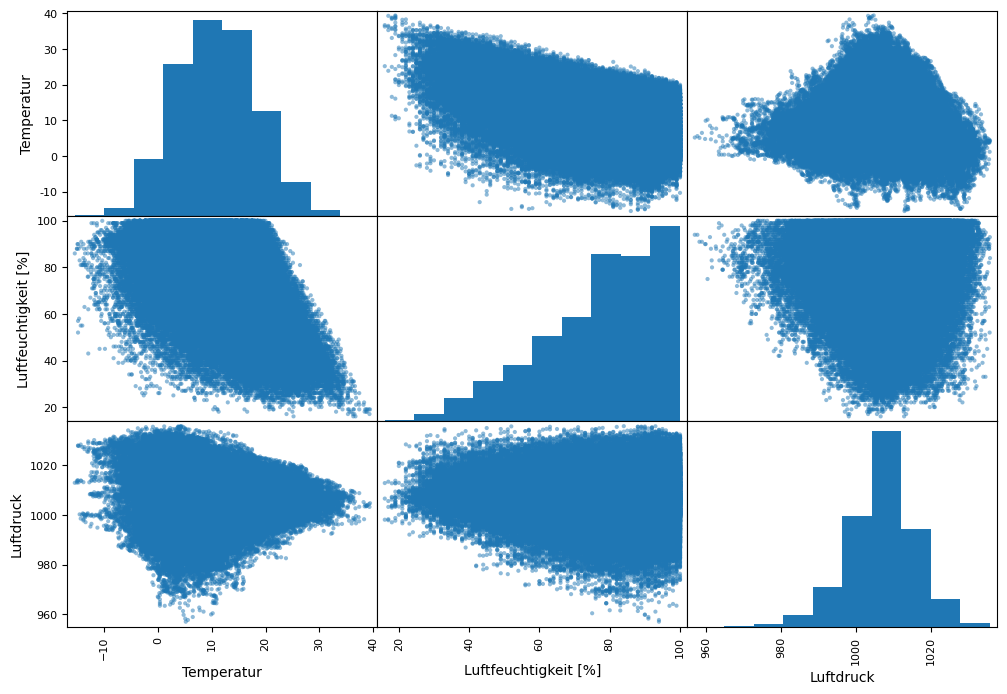

In [ ]:
attributes = ["Temperatur", "Luftfeuchtigkeit [%]", "Luftdruck"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

An den Scatterplots erkennt man die negative Korrelation zwischen der Temperatur zur Luftfeuchtigkeit ebenfalls. Ebenso wie die rechtslastige, ungleiche Verteilung der Messwerte der Luftfeuchtigkeit.

## 3.5 Trainings- und Testset

Es ist wichtig, den Datensatz erst in das Trainings- und Testset aufzuteilen, und anschließend erst die Standardisierung der Trainingsdaten vorzunehmen. [12]

Wird der gesamte Datensatz standardisiert, werden der Mittelwert, die Standardabweichung oder die Min/Max-Werte aus dem gesamten Datensatz inklusive der Testdaten berechnet.
Bei diesem Vorgehen beeinflusssen die Testdaten das Training. Das kann zu Overfitting führen, weil die Daten, mit denen die Vorhersagegenauigkeit geprüft werden soll schon im Training bekannt waren. Testdaten müssen völlig unbekannt sein, damit die Güte der Vorhersage bewertet werden kann.

Häufig werden 20% der gesamten Daten als Testdaten extrahiert. So wird auch hier vorgegangen.

Die Temperaturwerte werden sowohl als Inputwerte als auch als Label zum Trainieren genutzt. Deshalb sollen die Werte der Labels im Verhältnis zu den Trainingsdaten aus zeitlich späteren Messungen stammen. Dafür werden die Daten in "Fenster" eingeteilt, um die zeitliche Komponente zu erhalten.

In [ ]:

df.head()

,Temperatur,Luftfeuchtigkeit [%],Luftdruck
0,11.9,82.0,1006.60
1,13.7,68.0,1007.35
2,14.9,52.0,1007.30
3,13.3,75.0,1006.95
4,12.2,78.0,1007.10


Zeitreihe durch Fensterbildung erhalten:

Die Messwerte werden in "Fenster" eingeteilt, 30 Stunden Inputdaten sollen jeweils 20 Stunden Temperaturwerte als Label generieren.
Es werden Fenster über dem DataFrame gebildet. Mit "train_size" wird die Anzahl der Werte zum trainieren und mit "label_size" die Anzahl der Werte, die als Label verwendet werden, festgelegt. So wird der zeitliche Zusammenhang der Werte erhalten, auch wenn auf den Zeitstemptel verzichtet wird.

In [ ]:
def df_to_windows(df):
    df = df.drop(columns=['MESS_DATUM'])
    train_size = 30  # Anzahl der Stunden fürs Training
    label_size = 20
    start = 0
    series = []

    # Spaltennamen vorbereiten
    c = df.columns
    names = []

    # Input-Spaltennamen korrekt erzeugen
    for i in range(train_size, 0, -1):
        for col in c:
            names.append(f"{col}({i})")

    # Label-Spaltennamen (nur Temperatur)
    for i in range(label_size):
        names.append(f"Temperatur({i})")


    # Index der Temperaturspalte ermitteln
    label_col = "Temperatur"
    temp_index = df.columns.get_loc(label_col)


    # Fenster erzeugen
    while start < len(df) - (train_size + label_size):
        arr = df.iloc[start : start + train_size + label_size].to_numpy()
        temp = []

        # Trainingsdaten (volle Zeilen)
        for i in range(train_size):
            temp.extend(arr[i])  # einfacher als np.concatenate

        # Labeldaten (nur Temperaturwerte)
        for i in range(train_size, train_size + label_size):
            temp.append(arr[i][temp_index])

        series.append(temp)
        start += 1  # Fenster weiterschieben

    # DataFrame erzeugen
    final = pd.DataFrame(series, columns=names)
    #final.head()
    print(f"Anzahl Spaltennamen: {len(names)}")
    print(f"Anzahl Werte pro Zeile: {len(series[0])}")

    return final.iloc[:, :-label_size], final.iloc[:, -label_size:]


In [ ]:
df.head()

,Temperatur,Luftfeuchtigkeit [%],Luftdruck
0,11.9,82.0,1006.60
1,13.7,68.0,1007.35
2,14.9,52.0,1007.30
3,13.3,75.0,1006.95
4,12.2,78.0,1007.10


Alle Spalten außer den letzten "label_size" Spalten werden als Merkmale (X) ausgegeben, das sind die Messwerte, die in der Vergangenheit liegen. Mit
final.iloc[:, -label_size:] werden die letzten "label_size" Spalten extrahiert. Diese werden als Label (y) zum Training der Vorhersage genutzt. In diesem Projekt sind das die Temperaturwerte der nächsten 20 Stunden.

Um zu überprüfen, ob die Erstellung dieser Fenster dazu beiträgt, dass der zeitliche Zusammenhang der Messwerte erhalten bleibt, wird ein Fenster betrachtet.

In [ ]:
X, y = df_to_windows(df)
# Kombiniere Input und Label in einer Tabelle
window_table = pd.concat([X, y], axis=1)

# Zeige die ersten Zeilen
print(window_table.head(3))


Anzahl Spaltennamen: 110
Anzahl Werte pro Zeile: 110
   Temperatur(30)  Luftfeuchtigkeit [%](30)  Luftdruck(30)  Temperatur(29)  \
0            11.9                      82.0        1006.60            13.7   
1            13.7                      68.0        1007.35            14.9   
2            14.9                      52.0        1007.30            13.3   

   Luftfeuchtigkeit [%](29)  Luftdruck(29)  Temperatur(28)  \
0                      68.0        1007.35            14.9   
1                      52.0        1007.30            13.3   
2                      75.0        1006.95            12.2   

   Luftfeuchtigkeit [%](28)  Luftdruck(28)  Temperatur(27)  ...  \
0                      52.0        1007.30            13.3  ...   
1                      75.0        1006.95            12.2  ...   
2                      78.0        1007.10             9.8  ...   

   Temperatur(10)  Temperatur(11)  Temperatur(12)  Temperatur(13)  \
0            10.3             6.9            10

In [ ]:
# Mit der Funktion .shape() kann die Dimension der beiden Dataframes betrachtet werden.
# Das hilft beim Debuggen und für das Verständnis der Daten.
print("X shape:", X.shape)
print("y shape:", y.shape)



X shape: (205568, 90)
y shape: (205568, 20)


*   X shape: (205568, 90)
Die 90 Features ergeben sich aus dem Produkt von 30 Stunden und drei Merkmalen (Temperatur, Luftdruck, Luftfeuchtigkeit).

*   y shape: (205568, 20)
Die Temperatur für 20 Stunden soll vorhergesagt werden, womit sich dieser Wert für das Label y erklärt.   



Sowohl X und y haben 205.568 Zeilen. Das ist die Anzahl an Messungen, die im Datensatz (ohne Fehlwerte) enthalten waren. Da beide dieselbe Anzahl enthalten, können diese Dataframes für das Training der Vorhersagemodelle verwendet werden. Wenn sich die Anzahl der Zeilen hier nicht entsprechen, passen die Merkmale und die Label zum Training der Vorhersagemodelle nicht zusammen. Es würden entweder Label oder die entsprechenden Merkmale fehlen, so dass ein Training nicht möglich wäre.
Deshalb muss an dieser Stelle sichergestellt werden, dass die Zeilenanzahl beider Dataframes gleich ist.



In [ ]:
# 20% der Daten als Testdaten extrahieren
#Aufteilen der Daten in Train-Set und Test-Set

def split_data(df, ratio=0.2): # 20% als Defaultwert
    end = int((1 - ratio) * len(df))
    df_train = df.iloc[:end, :]  # die ersten 80 % der Zeilen zum Trainiern
    df_test = df.iloc[end:, :]   # die übrigen 20 % der Zeilen zum Testen
    return df_train, df_test



## 3.6 Datentransformation

Glätten und Standardisieren der Daten

Für die lineare Regression und die Support Vector Regression (SVR) werden alle Werte skaliert. Für den Decision Tree und den Random Forest, der aus Decision Trees besteht, müssen die Werte nicht skaliert werden, aber es schadet der Vorhersage nicht. Darum werden in diesem Projekt die Daten der Einfachheit halber alle skaliert.

In [ ]:
#Daten über Moving-Average glätten, um Ausreißer und Rauschen zu entfernen und die Qualität der Vorhersage damit zu verbessern.
def moving_average(df):
    df2 = df.copy()
    for col in df2.select_dtypes(include='number').columns:
      df2[col] = df2[col].rolling(window=3, center=True).mean()
    df2 = df2.dropna()
    return df2

Mit der Methode fit() werden Statistiken berechnet, um die Daten skalieren zu können. Bei der Standardisierung sind dies der Mittelwert und die Standardabweichung. Mit der Methode transform() werden diese dann auf die Daten angewendet.
Da die Vorhersagemodelle auch die Skalierungsparameter lernen sollen, aber nur anhand der Trainingsdaten lernen, werden die Skalierungsparameter auch nur aus den Trainingsdaten berechnet.

Die Methode fit() darf nicht auf die Testdaten angewendet werden, damit die Informationen aus den Testdaten dadurch nicht indirekt in das Modelltraining einfließen. Die Testdaten müssen den Modellen vor der Testphase vollkommen unbekannt sein, damit die Testergebnisse aussagekräftig sind.


In [ ]:
def scale_min_max(X_train, X_test, y_train, y_test):
    # Skalierer für X
    scaler_X = MinMaxScaler(feature_range=(-1, 1))
    X_train_scaled = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X_train.columns) # Trainingsdaten skalieren
    # columns=X_train.columns --> die Spaltennamen bleiben erhalten
    X_test_scaled = pd.DataFrame(scaler_X.transform(X_test), columns=X_test.columns) # Testdaten transform (ohne fit!)

    # Skalierer für y
    scaler_y = MinMaxScaler(feature_range=(-1, 1))
    y_train_scaled = pd.DataFrame(scaler_y.fit_transform(y_train), columns=y_train.columns) # Trainingsdaten skalieren
    y_test_scaled = pd.DataFrame(scaler_y.transform(y_test), columns=y_test.columns) # y_test skalieren (nur transform, ohne fit)

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled


In der Funktion prepare_data werden alle Funktionen, die zur Vorbereitung der Daten für die Vorhersagemodelle notwendig sind aufgerufen, so dass hier die Trainings- und Testdaten für die Modelle an einer Stelle zugewiesen werden können.

In [ ]:
def prepare_data(url_temperature, url_pressure):
    df = import_and_combine_data(url_temperature, url_pressure) # hier werden die Daten heruntergeladen und die beiden Datensätze werden kombiniert
    df = missing_values(df) # Umgang mit fehlenden Werten
    df = df.drop(columns=['MESS_DATUM'])
    # Führe beide Merkmale für Luftdruck zu einem zusammen:
    df['Luftdruck'] = df[['Luftdruck auf Stationshöhe', 'Luftdruck auf Meereshöhe']].mean(axis=1)
    # entferne die unnötigen Merkmale:
    df.drop(columns=['Luftdruck auf Stationshöhe', 'Luftdruck auf Meereshöhe'], inplace=True)
    #df.head()
    X, y = df_to_windows(df)

    X = moving_average(X) # Daten glätten mit der Funktion moving average (um den Einfluss von Ausreißern zu minimieren)
    y = moving_average(y) # Daten glätten mit der Funktion moving average (um den Einfluss von Ausreißern zu minimieren)
    X_train, X_test = split_data(X)
    y_train, y_test = split_data(y)
    X_train, X_test, y_train, y_test = scale_min_max(X_train, X_test, y_train, y_test)

    return X_train, X_test, y_train, y_test



# 6. Qualitätsmaß

**RMSE** (Root Mean Squared Error)

Der Root Mean Square Error (RMSE) wird für Regressionsmodelle am häufigsten als Gütekriterium verwendet. Um ein gutes Vorhersagemodell zu erhalten, werden für den Bias-Term und die Gewichte durch das sogenannte "Training" die Werte gesucht, für die der RMSE minimal wird.

$\text{RMSE} (X, h) = \sqrt{ \frac{1}{m} \sum_{i=1}^{m} \left( h(x_i) - y_i \right)^2 }$

- $x_i$ ist ein Vektor der Werte aller Inputwerte des i. Datenpunkts
- $y_i$ tatsächlicher Vorhersagewert an der Stelle i (Temperaturwert)
- $h$ bezeichnet die Hypothese, das ist die Vorhersagefunktion

# 5. Modelle erstellen und trainieren


Für die Optimierung der Modellparameter wird die Funktion GridSearchCV von scikit-learn verwendet. Folgende Hyperparameter werden für die verschiedenen Modelle auf die Zeit, die vorzusagen ist, optimiert.


Lineare Regression
1.   fit intercept: True, False

Random Forest
1. Criterion: MSE, Friedman MSE

SVR-Algorithmen
1.   C: 100
2.   Degree: 1, 3, 4
3.   Epsilon: 0,1  
4.   Kernel: rbf, poly


## 5.1 Vorhersagemodelle

Für die Temperaturvorhersage betrachtete Modelle:
1. Lineare Regression
2. Random Forest
3. Support Vector Regression


In [ ]:
# Hier werden die Input- und Outputwerte aus den Messwerten zusammengesetzt:

X_train, X_test, y_train, y_test = prepare_data(url, url_pres)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

Anzahl Spaltennamen: 110
Anzahl Werte pro Zeile: 110
X_train shape: (164452, 90)
y_train shape: (164452, 20)


### 5.1.1 Lineare Regression

Vorhersagen linearer Modelle ergeben sich aus der gewichteten Summe der Inputwerte und des Bias-Terms.

$y = a_0 + a_1 x_1 + a_2 x_2 + \dots + a_n x_n$

- $y$:  Vorhersagewert

- $x_i$: Inputwerte (Temperatur, Luftdruck auf Meereshöhe, Luftdruck auf Stationshöhe, Feuchtigkeit)

- $a_i$: Gewichte

- $a_0$: Bias-Parameter

In [ ]:
# Modell Lineare Regression trainieren
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


# RMSE pro Stunde berechnen
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    print(f"Stunde {i}: RMSE: {rmse:.2f} °C")

Stunde 0: RMSE: 0.01 °C
Stunde 1: RMSE: 0.02 °C
Stunde 2: RMSE: 0.04 °C
Stunde 3: RMSE: 0.05 °C
Stunde 4: RMSE: 0.06 °C
Stunde 5: RMSE: 0.07 °C
Stunde 6: RMSE: 0.08 °C
Stunde 7: RMSE: 0.08 °C
Stunde 8: RMSE: 0.09 °C
Stunde 9: RMSE: 0.09 °C
Stunde 10: RMSE: 0.09 °C
Stunde 11: RMSE: 0.09 °C
Stunde 12: RMSE: 0.10 °C
Stunde 13: RMSE: 0.10 °C
Stunde 14: RMSE: 0.10 °C
Stunde 15: RMSE: 0.10 °C
Stunde 16: RMSE: 0.10 °C
Stunde 17: RMSE: 0.10 °C
Stunde 18: RMSE: 0.10 °C
Stunde 19: RMSE: 0.10 °C


Die Vorhersageergebnisse der lineare Regression zeigen, dass die ersten Stunden sehr gut vorhersagt werden können, mit einer stündlich ansteigenden Abweichung im Hundertstelbereich bzw. Zehntelbereich.

<Figure size 1000x1000 with 0 Axes>

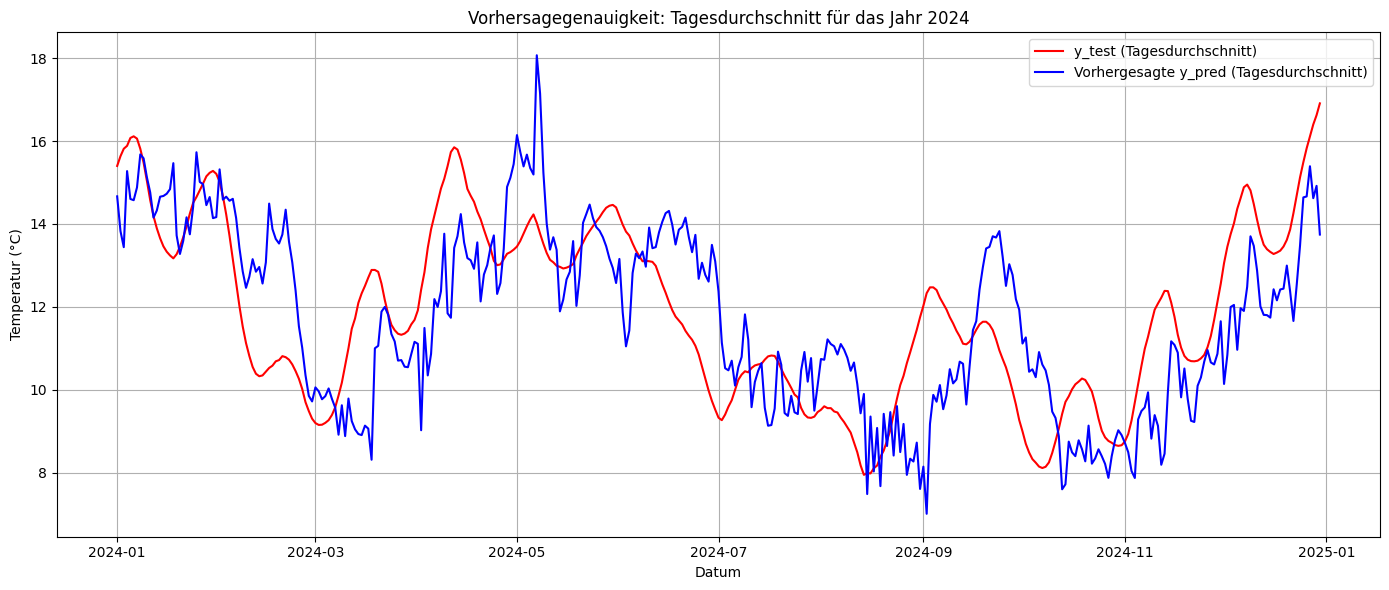

In [ ]:
plt.clf()
# Plot zum Vergleich von y_test und y_pred, um die Vorhersagegenauigkeit zu visualisieren
# Tagesdurchschnitt berechnen
daily_avg = np.mean(y_test, axis=1)
pred_daily_avg = np.mean(y_pred, axis=1)
#Zeitachse erzeugen
#Startdatum ist der 1. Januar 2024
dates = pd.date_range(start="2024-01-01", periods=len(daily_avg), freq="D")

# Begrenzung auf ein Jahr, damit der Plot übersichtlich ist
max_days = 365 #die ersten 365 Tage ab dem 1. Januar 2024
year = daily_avg[:max_days]
pred_year = pred_daily_avg[:max_days]
dates_year = dates[:max_days]

#Plot erstellen
plt.figure(figsize=(14, 6))
plt.plot(dates_year, year, label="y_test (Tagesdurchschnitt)", color='red')
plt.plot(dates_year, pred_year, label="Vorhergesagte y_pred (Tagesdurchschnitt)", color='blue')
plt.title("Vorhersagegenauigkeit: Tagesdurchschnitt für das Jahr 2024")
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Der Verlauf von den Testdaten ist wesentlich ruhiger, weil vor dem Training der gesamte Datensatz mit moving average geglättet wurde. Der zeitliche Versatz der Daten könnte durch Fehler bei der Erstellung der Zeitfenster zu erklären sein oder darauf hinweisen, dass das Modell die Vorhersage nur bis zu diesem Genauigkeitsgrad durchführen kann.


### 5.1.2 Decision Tree und Random Forest


Das Ergebnis dieser Berechnung ist der Vorhersagewert für die Temperatur $y$, den wir mit dem bekannten tatsächlichen Temperaturwert vergleichen können, um die Genauigkeit unseres Modells zu berechnen. Da es sich dabei um eine Regressionsaufgabe handelt, wird ein DecisionTreeRegressor-Modell erstellt.

Die Datenvorbereitung ist für die Verwendung von Entscheidungsbäumen nicht in dem Maße erforderlich wie für die anderen hier verwendeten Modelle.
Skalierung oder Zentrierung von Merkmalen ist nicht notwendig.

Zuerst werden mithilfe der Gittersuche mit Kreuzvalidierung (GridSearchCV) geeignete Hyperparameter für ein Decision Tree Modell erstellt und trainiert. Für diesen Vergleich gibt es verschiedene Gütekriterien. In diesem Projekt wird der RMSE dafür verwendet.


In [ ]:
def find_decision_tree(X_train, Y_train):
    model = DecisionTreeRegressor()

    # Parametergrid für GridSearchCV
    param_grid = {
        'criterion': ['friedman_mse'],
        'max_depth': [5, 10],           # die Tiefe begrenzen, um Rechenkapazität zu sparen
        'min_samples_split': [2, 5, 10]
    }


    # GridSearchCV Setup
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        verbose=2,
        return_train_score=True
    )

    # Training
    grid_search.fit(X_train, Y_train)

    # Ergebnisse
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    cv_results = grid_search.cv_results_

    print(f"\n Beste Parameter: {best_params}")
    print(" RMSE pro Konfiguration:")
    for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
        print(f"  RMSE: {np.sqrt(-mean_score):.4f} | Params: {params}")

    return best_model


In [ ]:
best_tree_model = find_decision_tree(X_train, y_train)
Y_pred = best_tree_model.predict(X_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END criterion=friedman_mse, max_depth=None, min_samples_split=2; total time=  25.8s
[CV] END criterion=friedman_mse, max_depth=None, min_samples_split=2; total time=  25.5s
[CV] END criterion=friedman_mse, max_depth=None, min_samples_split=2; total time=  26.3s
[CV] END criterion=friedman_mse, max_depth=None, min_samples_split=2; total time=  24.6s
[CV] END criterion=friedman_mse, max_depth=None, min_samples_split=2; total time=  24.8s
[CV] END criterion=friedman_mse, max_depth=None, min_samples_split=5; total time=  23.2s
[CV] END criterion=friedman_mse, max_depth=None, min_samples_split=5; total time=  23.2s
[CV] END criterion=friedman_mse, max_depth=None, min_samples_split=5; total time=  23.7s
[CV] END criterion=friedman_mse, max_depth=None, min_samples_split=5; total time=  24.1s
[CV] END criterion=friedman_mse, max_depth=None, min_samples_split=5; total time=  23.6s
[CV] END criterion=friedman_mse, max_depth=None, m

Das Ergebnis der GridSearch ergibt - unter den Einschränkungen, die aufgrund der begrenzt verfügbaren Rechenkapazität vorgenommen wurden - dass folgende Konstellation das best mögliche Decision Tree Modell für diese Aufgabe ergibt:
Beste Parameter: {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_split': 10}

1.   'criterion': 'friedman_mse'- Friedman-Variante des mittleren quadratischen Fehlers

2.   'max_depth': 10 - Begrenzung der Baumtiefe auf 5 Ebenen hilft, Overfitting zu vermeiden und sorgt für ein besser generalisierendes Modell

3.    'min_samples_split': 10 - ein Knoten wird geteilt, sobald er mindestens zwei Samples enthält

Mit diesen Parametern beträgt der RMSE: 0.1048
Das heißt, dass die Vorhersage um 0,10°C von der tatsächlichen Temperatur abweicht.






Random Forest Regressor [12]

Der Random Forest Algorithmus ist zurzeit einer der mächtigsten Machine-Learning-Algorithmen und gehört zu den Ensemble-Methoden. Der Grund dafür ist, dass er aus mehreren einzelnen Entscheidungsbäumen (Decision Trees) gebildet wird. Das Ergebnis des Random Forest entsteht durch die Mittelung der Ergebnisse dieser einzelnen Entscheidungsbäume. Ebenso wie neuronale Netze gehören Random Forest Modelle zu den sogenannte Black-Box-Modellen , was bedeutet, dass die Erklärbarkeit für den Grund ihrer Vorhersagen nicht trivial ist.

Da ein Random Forest aus mehreren Decision Trees besteht, ist die Vorhersage eines Random Forest in der Regel sehr viel genauer.


In [ ]:
def find_forest(X_train, Y_train):
  param_grid = {
      'n_estimators': [100, 200],
      'max_depth': [10, 20],
      'max_features': ['sqrt', 'log2'],
      'min_samples_split': [2, 5],
      'min_samples_leaf': [1, 2]
  }

  grid_search = GridSearchCV(
      estimator=RandomForestRegressor(random_state=42),
      param_grid=param_grid,
      cv=5,
      scoring='neg_root_mean_squared_error',
      n_jobs=-1
  )

  grid_search.fit(X_train_restr, Y_train_restr)
  best_model = grid_search.best_estimator_
  return best_model

In [ ]:

rf_model = RandomForestRegressor(
      n_estimators=100,      # Anzahl der Bäume
      max_depth=10,        # Tiefe der Bäume (optional begrenzen)
      random_state=42        # Für Reproduzierbarkeit
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)



In [ ]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE Random Forest:", rmse)


RMSE: 0.08801316069172517


### 5.3.3 Support Vector Regression (SVR)
SVR ist robust gegenüber Ausreißern. SVR ignoriert kleine Fehler innerhalb einer Toleranz (ε), was bei schwankenden Wetterdaten hilfreich ist.
Nichtlineare Zusammenhänge sind via Kernel-Trick erkennbar. Mit einem RBF-Kernel kann SVR auch nichtlineare Muster lernen, etwa das Zusammenspiel zwischen Luftdruck, Tageszeit und Temperatur.
Im Gegensatz zu neuronalen Netzen braucht SVR keine riesigen Datenmengen und ist daher für lokal begrenzte Wetterstationen gut geeignet, bei denen es eine begrenzte Anzahl an Daten gibt, weil nur die Messwerte des einen Ortes genutzt werden.

Getestete SVR Hyperparameter:
1.   C: 100
2.   Degree: 1, 3, 4
3.   Epsilon: 0,1  
4.   Kernel: rbf

In [ ]:
X_train, X_test, y_train, y_test = prepare_data(url, url_pres)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

In [ ]:
X_train_restr = X_train[:500]
Y_train_restr = y_train[:500]

for hour in range(20):
    y_train_h = y_train.iloc[:500, hour].values.ravel()  # nur die ersten 500 Zeilen
    y_test_h = y_test.iloc[:, hour].values.ravel()       # vollständiger Testdatensatz

    svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    svr_model.fit(X_train_restr, y_train_h)
    y_pred_h = svr_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test_h, y_pred_h))
    print(f"Stunde {hour+1}: RMSE SVR = {rmse:.2f}")



Stunde 1: RMSE = 0.25
Stunde 2: RMSE = 0.25
Stunde 3: RMSE = 0.24
Stunde 4: RMSE = 0.24
Stunde 5: RMSE = 0.24
Stunde 6: RMSE = 0.24
Stunde 7: RMSE = 0.25
Stunde 8: RMSE = 0.24
Stunde 9: RMSE = 0.24
Stunde 10: RMSE = 0.24
Stunde 11: RMSE = 0.24
Stunde 12: RMSE = 0.24
Stunde 13: RMSE = 0.24
Stunde 14: RMSE = 0.24
Stunde 15: RMSE = 0.24
Stunde 16: RMSE = 0.24
Stunde 17: RMSE = 0.24
Stunde 18: RMSE = 0.24
Stunde 19: RMSE = 0.24
Stunde 20: RMSE = 0.24


# 6. Ergebnisse und Ausblick



| Modell             | RMSE (°C)       |
|--------------------|-----------------|
| Random Forest      | 0.088           |
| Decision Tree      | 0.1048          |
| Lineare Regression | 0.01 – 0.10     |
| SVR                | 0.24 – 0.25     |


Die Ergebnisse der in diesem Projekt getesteten Modelle anhand der erreichten Werte für den RMSE sind nicht eindeutig miteinander vergleichbar. Die Vermutung, dass SVR-Modelle, insbesondere für die langfristige Temperaturvorhersage, die besten Ergebnisse liefern, konnte nicht bestätigt werden. Da die Umsetzung dieses Projekts mit Beschränkungen der Rechenkapazität erfolgte, wurden für das SVR weniger Trainingsdaten verwendet als für die anderen Modelle. Dadurch ist der RMSE nicht mit den Modellen vergleichbar, die mit allen Trainingsdaten trainiert werden konnten. Die Anzahl valider Trainingsdaten hat einen großen Einfluss auf die Vorhersagegenauigkeit.

Die Erhöhung der Anzahl der Stunden für das Training hat nicht zu den erwarteten Verbesserungen der Genauigkeit geführt. Werden die Ergebnisse in Relation zum Bedarf an Arbeitsspeicher und Zeit gesetzt, ist das Training mit Inputwerten von 30 Stunden am effizientesten für die hier untersuchten Modelle. Aufgrund des steigenden Arbeitsspeicherbedarfs für das Training der polynominalen Regression in Abhängigkeit ihrer Dimension, konnte dieses Modell nicht implementiert werden. Mit größeren Arbeitsspeicher oder einer Dimensionsreduktion wäre ein Modell höherer Ordnung möglich und eine sinnvolle Erweiterung des bestehenden Projektes.

Die Ansätze aller bisher vorgenommenen Untersuchungen sind auch in anderen Bereichen sehr unterschiedlich. Für die Vorhersage einzelner Stunden erscheint es zielführend, die Daten einzelner Stunden zum Training zu verwenden. Es gibt jedoch Wissenschaftler, die Durchschnittswerte je Tag gebildet haben wie auch Zhang et Dong [10]. Der Zeithorizont bis zu dem vergangene Daten für das Training der Vorhersagemodelle verwendet werden, ist ebenfalls sehr unterschiedlich. Singh et al.(2019) [2] nutzen Daten der vergangenen 20 Jahre, Zhang et Dong (2020) [10] nutzen sogar Daten der vergangenen 66 Jahre. Für die in dieser Ausarbeitung beschriebenen Modelle werden hingegen Daten von ungefähr 24 Jahren verwendet.

Zu Projektbeginn erschien die Aktualität der Daten von großer Bedeutung zu sein. Diese Auffassung hat sich im Laufe der Arbeit verändert. Aufgrund der Einteilung der Daten in Fenster werden die zeitlichen Zusammenhänge bei der weiteren Verarbeitung bewahrt und die Literaturrecherche weist darauf hin, dass die Datensatzerweiterung mit älteren Daten sinnvoll ist. Ein Grund kann sein, dass sich in den letzten Jahrzehnten die klimatischen Bedingungen zwar verändert haben, aber die klimatischen Zusammenhänge geblieben sind. Und diese Zusammenhänge sind es, die die Vorhersagemodelle abbilden.

Mit meteorologischen Fachkenntnissen kann der Datensatz erweitert und dadurch die Vorhersagegenauigkeit verbessert werden. Wenn bekannt ist, welche Messstationen in klimatisch sehr ähnlichen Gebieten liegen, können die Messwerte dieser Stationen zu einem Datensatz zusammengefasst werden. In diesem Projekt wurden die Messwerte einer einzelnen Messstation verwendet. Diese Überlegungen zeigen, wie wichtig die Zusammenarbeit mit Fachpersonal aus dem betreffenden Themengebiet für die Erstellung eines performanten Machine Learning Modells sein kann.

Eine weitere sinnvolle Verbesserung kann die Erweiterung der Merkmale sein. Singh et al. (2019) [2] stellen fest, dass Temperatur, Luftfeuchtigkeit und Luftdruck am stärksten mit Regenmenge korrelieren. Daher ist es denkbar, dass die Regenmenge als weiteres Merkmal eine zusätzliche Verbesserung der Vorhersagegenauigkeit bewirken kann.

Durch das Glätten der Daten mithilfe des Moving Average konnte die Genauigkeit der Vorhersage, entgegen ursprünglicher Vermutung, sichtbar verbessert werden.

Wenn der Datensatz viele Ausreißer hat, also Werte, die von den vorhergehenden und nachfolgenden Werten stark abweichen, könnte der MAE als Gütekriterium besser geeignet sein.

Regelmäßigkeit neue Daten zu importieren, um die aktuelle Vorhersagen zu treffen, ist eine weitere sinnvolle Erweiterung dieses Programms. Unter der URL https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/recent/ gibt es fortlaufen die neuesten Messergebnisse.

In [ ]:
# Alle verwendeten Pakete:
!pip freeze

<a name="ref"></a>
## 9. Quellen & Referenzen


[1] Pham et al., 2023, "Toward Deep-Learning-Based Methods in Image
Forgery Detection: A Survey".

[2] Singh et al., 2019, "Weather Forecasting Using Machine Learning Algorithm".

[3] Sravanthi et al., 2020, ``An Ensemble Approach to Predict Weather Forecast using Machine Learning''.

[4] E. R. Rodrigues et al., 2018, ``DeepDownscale: a deep learning strategy for high-resolution weather forecast''.

[5] Open-Data Server des Deutschen Wetterdienstes, aufgerufen am 03.07.2025, https://opendata.dwd.de/

[6] Beschreibung Temperatur, aufgerufen am 03.07.2025, https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/BESCHREIBUNG_obsgermany_climate_hourly_air_temperature_de.pdf

[7] Salcedo-Sanz et al., 2015 , "Monthly prediction of air temperature in Australia and New Zealand with machine learning algorithms".

[8] Internetauftritt zu Statistikthemen, aufgerufen am 03.07.2025, http://www.regorz-statistik.de/inhalte/tutorial_polynomiale_regression.html

[9] Deutscher Wetterdienst, aufgerufen am 03.07.2025, https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/recent/BESCHREIBUNG_obsgermany_climate_hourly_tu_recent_de.pdf/???

[10] Z. Zhang et Y. Dong, 2020, "Temperature Forecasting via Convolutional Recurrent Neural Networks Based on Time-Series Data"

[11] B. Azari et al., 2022, "Evaluation of Machine Learning Methods Application in Temperature Prediction".

[12] Aurélien Géron, "Praxiseinstieg Machine Learning mit Scikit-Learn und TensorFlow- Konzepte, Tools und Techniken für intelligente Systeme", O'Reilly, 3. Auflage 2023

[13] Copilot wurde zum Debuggen verwendet.

## 10. Eigenständigkeitserklärung


Ich versichere, dass ich diese Facharbeit selbständig angefertigt und keine anderen als die von mir angegebenen und bei Zitaten kenntlich gemachten Quellen und Hilfsmittel benutzt und die vorliegende Arbeit an keiner anderen Stelle zur Erlangung eines Abschlusses vorgelegt habe.